In [37]:
from google.cloud import bigquery
from openai import AzureOpenAI
import pandas as pd

client = bigquery.Client()

project_id = 'ingka-online-analytics-prod'
dataset_id = 'app_data_v2'
table_id = 'app_surveys'

table_ref = f'{project_id}.{dataset_id}.{table_id}'

query = f"""
    SELECT distinct date, operating_system, market, language, app_version, store_no, rating, survey_id, answer_local_language, answer_translated
    FROM `{table_ref}`
    WHERE answer_translated is not null and rating != 0
"""

query_job = client.query(query)

df = query_job.to_dataframe()

# Basic analysis
print(df.head())

/Users/davide.zanutto1/Desktop/app-reviews-data/app-reviews-data/lib/python3.9/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


         date operating_system market language app_version store_no  rating  \
0  2024-04-13              iOS     IE       EN    03.63.00      038       2   
1  2021-10-07          Android     IE       EN    03.02.00     None       5   
2  2022-07-17          Android     HR       HR    03.21.00     None       5   
3  2021-10-04              iOS     IE       EN    03.02.00     None       5   
4  2024-09-12          Android     IE       EN    03.74.00     None       1   

                            survey_id  \
0                     checkout-survey   
1                     checkout-survey   
2  scanshop-order-confirmation-online   
3                     checkout-survey   
4                exit-checkout-survey   

                               answer_local_language  \
0                                          Annoying    
1  Fab! Item came back into stock in estimated ti...   
2                                               cool   
3                                           Love app  

In [38]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# General statistics of numerical columns
print("Rating statistics:\n", df.describe())

Missing values:
 date                          0
operating_system              0
market                        0
language                      0
app_version                   0
store_no                 199112
rating                        0
survey_id                  5405
answer_local_language         0
answer_translated             0
dtype: int64
Rating statistics:
          rating
count  734657.0
mean   4.250952
std    1.213498
min         1.0
25%         4.0
50%         5.0
75%         5.0
max         5.0


/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/2608546890.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_counts.index, y=market_counts.values, palette="viridis")


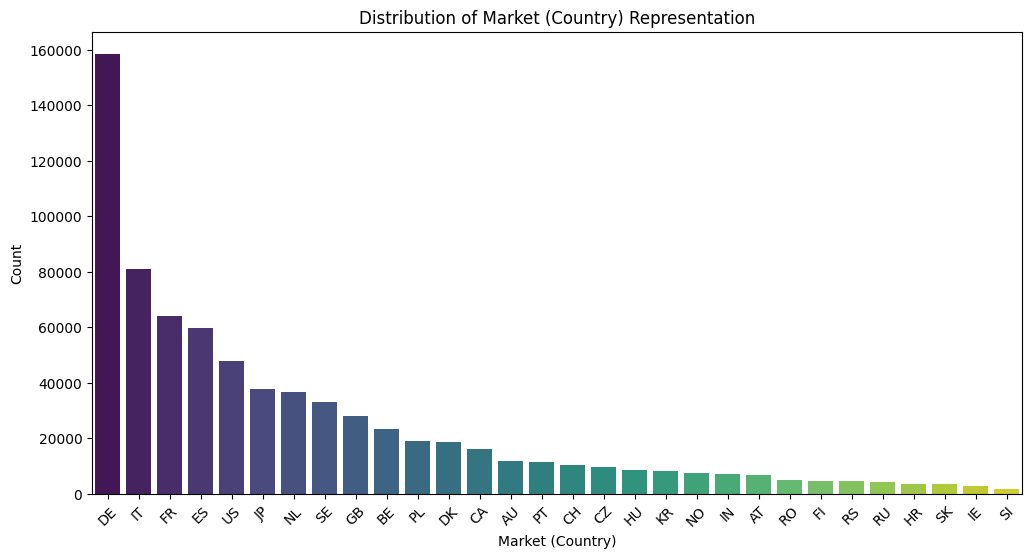

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences for each market
market_counts = df['market'].value_counts()

# Plotting the distribution of markets
plt.figure(figsize=(12, 6))
sns.barplot(x=market_counts.index, y=market_counts.values, palette="viridis")
plt.title("Distribution of Market (Country) Representation")
plt.xlabel("Market (Country)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/2756992990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_market.index, y=avg_rating_market.values, palette="plasma")


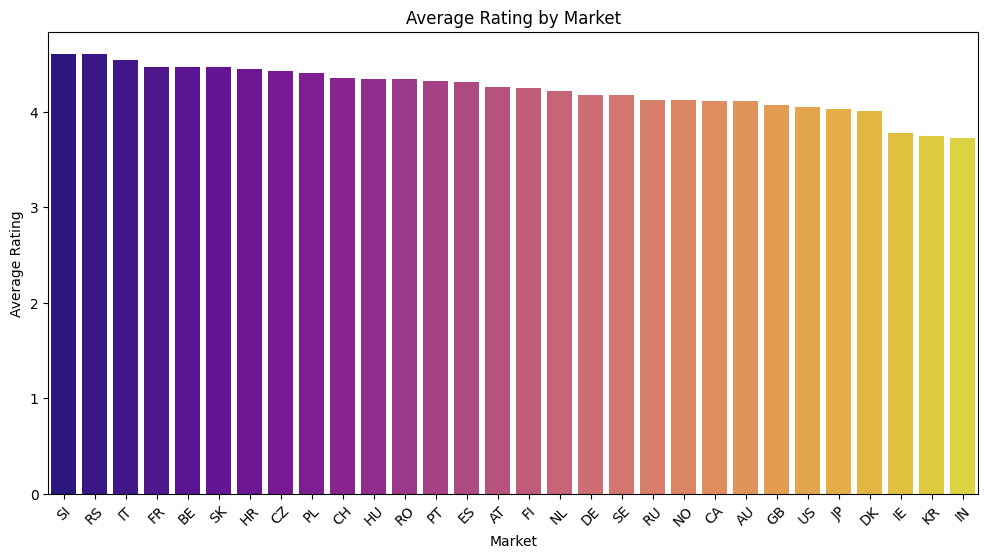

In [40]:
# Calculate average rating by market
avg_rating_market = df.groupby("market")["rating"].mean().sort_values(ascending=False)

# Plot average rating by market
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_market.index, y=avg_rating_market.values, palette="plasma")
plt.title("Average Rating by Market")
plt.xlabel("Market")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/141943578.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_os.index, y=avg_rating_os.values, palette="cool")


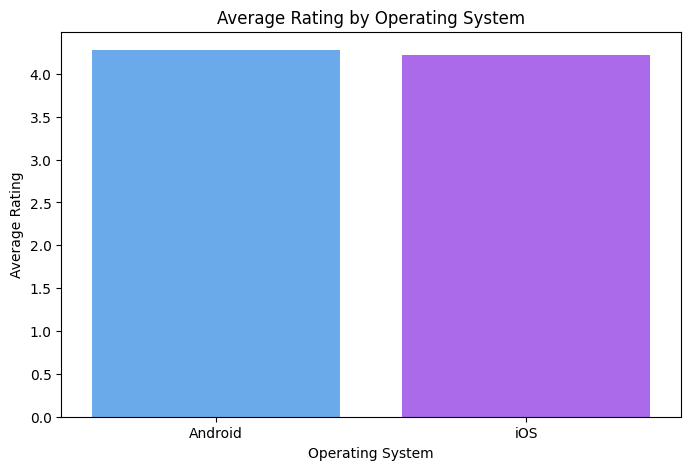

In [41]:
# Calculate average rating by operating system
avg_rating_os = df.groupby("operating_system")["rating"].mean().sort_values(ascending=False)

# Plot average rating by operating system
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_os.index, y=avg_rating_os.values, palette="cool")
plt.title("Average Rating by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Rating")
plt.show()

/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/2992080076.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_counts.index, y=market_counts.values, palette="viridis")


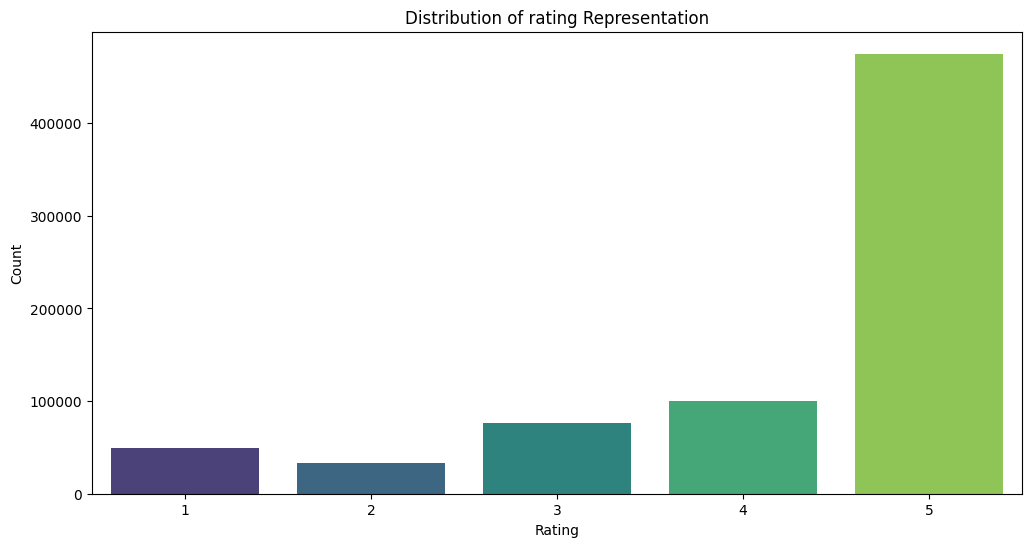

In [42]:
market_counts = df['rating'].value_counts()

# Plotting the distribution of markets
plt.figure(figsize=(12, 6))
sns.barplot(x=market_counts.index, y=market_counts.values, palette="viridis")
plt.title("Distribution of rating Representation")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/4118130928.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=version_counts.index, y=version_counts.values, palette="magma")


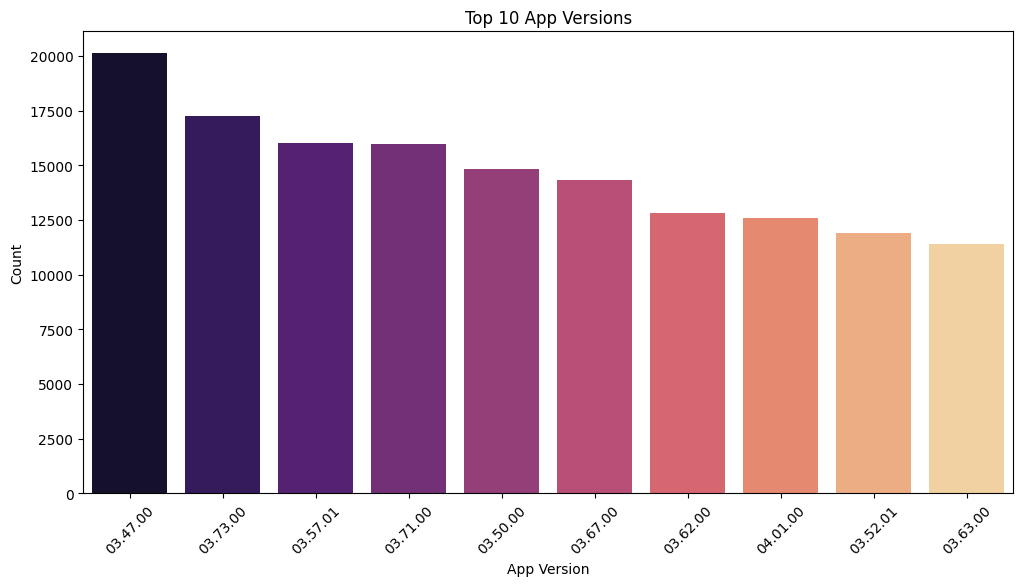

In [43]:
# Count of records by app version
version_counts = df['app_version'].value_counts().nlargest(10)

# Plotting app version usage
plt.figure(figsize=(12, 6))
sns.barplot(x=version_counts.index, y=version_counts.values, palette="magma")
plt.title("Top 10 App Versions")
plt.xlabel("App Version")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/1652264089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="Set2")


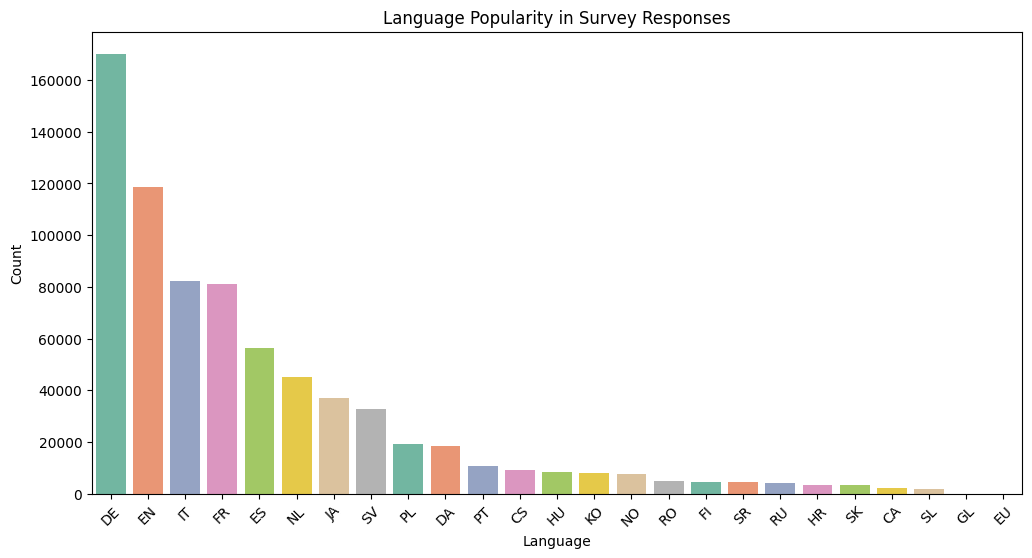

In [44]:
# Count of responses in each language
language_counts = df['language'].value_counts()

# Plotting language popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="Set2")
plt.title("Language Popularity in Survey Responses")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

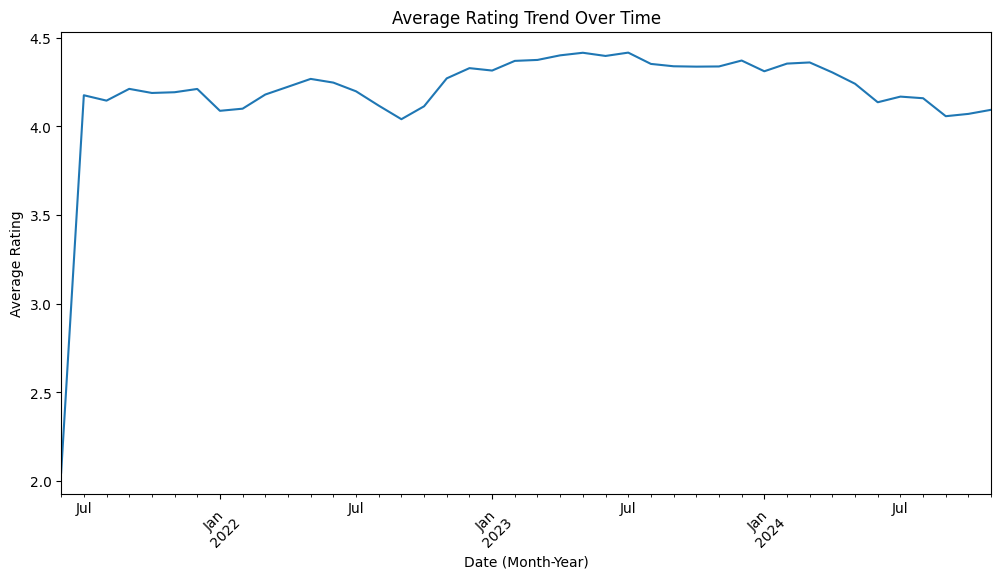

In [45]:
# Convert date column to datetime format for time-based analysis
df['date'] = pd.to_datetime(df['date'])

# Group by month-year and calculate the average rating
df['month_year'] = df['date'].dt.to_period('M')
monthly_rating = df.groupby('month_year')['rating'].mean()

# Plot monthly average rating trend
plt.figure(figsize=(12, 6))
monthly_rating.plot()
plt.title("Average Rating Trend Over Time")
plt.xlabel("Date (Month-Year)")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

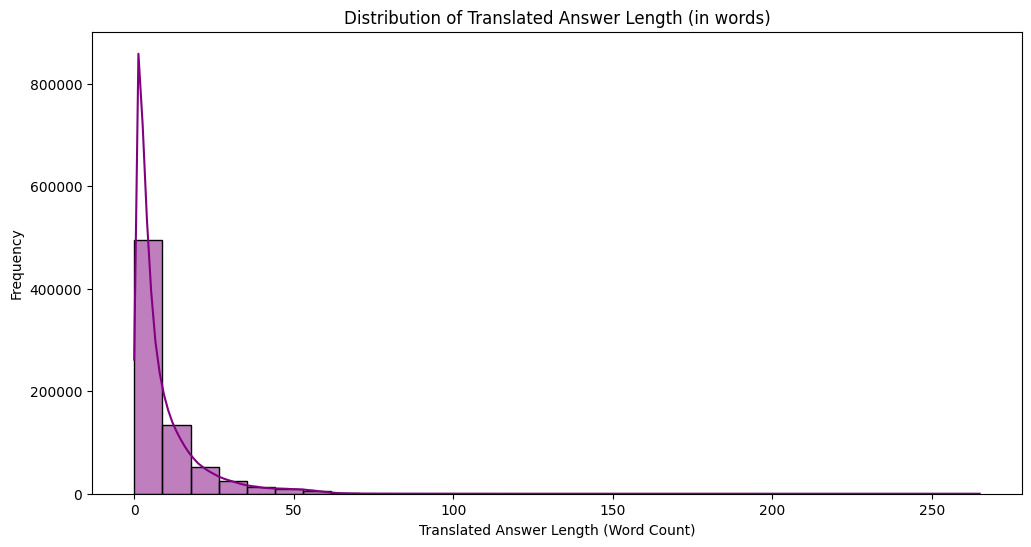

In [46]:
df['translated_answer_length'] = df['answer_translated'].apply(lambda x: len(str(x).split()))

# Display the distribution of answer length
plt.figure(figsize=(12, 6))
sns.histplot(df['translated_answer_length'], bins=30, kde=True, color='purple')
plt.title("Distribution of Translated Answer Length (in words)")
plt.xlabel("Translated Answer Length (Word Count)")
plt.ylabel("Frequency")
plt.show()

In [47]:
# Check for mismatches by grouping
market_language_pairs = df.groupby(['market', 'language']).size().reset_index(name='count')

print("Market-Language Pairs (Check for Mismatches):")
print(market_language_pairs)

Market-Language Pairs (Check for Mismatches):
   market language   count
0      AT       DE    6660
1      AT       EN     100
2      AU       EN   11675
3      BE       EN     633
4      BE       FR   11910
5      BE       NL   10678
6      CA       EN   13644
7      CA       FR    2430
8      CH       DE    5285
9      CH       EN     851
10     CH       FR    2892
11     CH       IT    1479
12     CZ       CS    9352
13     CZ       EN     342
14     DE       DE  158211
15     DE       EN     247
16     DK       DA   18574
17     ES       CA    2264
18     ES       EN    1238
19     ES       ES   56272
20     ES       EU       7
21     ES       GL      56
22     FI       EN      21
23     FI       FI    4651
24     FR       FR   64010
25     GB       EN   28163
26     HR       HR    3404
27     HU       HU    8424
28     IE       EN    2668
29     IN       EN    7148
30     IT       IT   80827
31     JP       EN     642
32     JP       JA   37094
33     KR       EN     106
34     KR

Number of entries in English: 573732
Number of entries in non-English: 160925


/var/folders/yb/zpvj9lnd4130b8bpn770jb680000gp/T/ipykernel_78974/975605990.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['English', 'Non-English'], y=[english_count, non_english_count], palette="pastel")


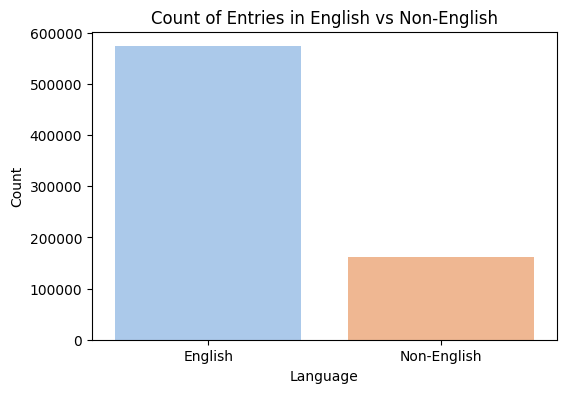

In [48]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Fix randomness in langdetect
DetectorFactory.seed = 0

# Function to detect if a text is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False 

# Apply the function to the desired field, e.g., 'answer_translated'
df['is_english'] = df['answer_translated'].apply(is_english)

# Count how many entries are in English and non-English
english_count = df['is_english'].sum()
non_english_count = len(df) - english_count

print("Number of entries in English:", english_count)
print("Number of entries in non-English:", non_english_count)

# Optional: Plot the results
plt.figure(figsize=(6, 4))
sns.barplot(x=['English', 'Non-English'], y=[english_count, non_english_count], palette="pastel")
plt.title("Count of Entries in English vs Non-English")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

In [51]:
non_english_examples = df[df['is_english'] == False].head(20)
print("Examples of non-English rows:")
print(non_english_examples[['answer_translated']])

Examples of non-English rows:
                  answer_translated
0                         Annoying 
3                          Love app
8                          nice app
14  Super friendly employee Željka 
18                              Yes
20                         discount
22                      Hassle free
34                        excellent
38                         All good
55                            speed
62    Fast, convenient and simple:)
69                    Easy to buy. 
72                            speed
75                               :)
76                               :)
77    too many unavailable products
79                        discount!
80                          Sad app
82                      all great! 
85                               ok
